# Deep Learning for Computer Vision: Final Project

## Computer Science: COMS W 4995 011



### Final Report: Due December 8, 2023

# Augmentation of Medical Imaging Data using SinGAN

## Participants:
- Maitar Asher (ma4265)
- Jonathan Fisher (see collaborative note)

## Project Description:

### Objectives:
The primary objective of this project is to leverage the power of ConSinGAN, an image synthesis technique, to artificially introduce cancer metastases within healthy medical scans. This will address the common challenge of limited availability of annotated data containing cancer metastases for training deep learning models. By augmenting existing datasets with synthetic cancer metastases, this project aim to enhance the performance of neural network models in detecting cancerous regions in medical images.

### About SinGan

SinGAN is "a new unconditional generative model trained on a single natural image. [The] model learns the image's patch statistics across multiple scales, using a dedicated multi-scale adversarial training scheme; it can then be used to generate new realistic image samples that preserve the original patch distribution while creating new object configurations and structures." For more details, please refer to the paper and additional information available at https://tamarott.github.io/SinGAN.htm.

### About ConSinGan
ConSinGAN, an evolution of SinGAN, further refines the landscape of image generation. Through strategic architectural and
training modifications such as parallel training with different
learning rates, direct feature propagation between stages, and
an enhanced rescaling approach, ConSinGAN achieves re-
markable improvements in generating realistic images while
significantly reducing overall training time compared to the
original SinGAN framework.
https://github.com/tohinz/ConSinGAN

## Data



## Collaborative Note:

This project is based on an idea collaboratively developed with Jonathan Fisher. With Fisher's permission, I will be implementing a mini version of this concept independently. It is anticipated that this work may serve as a foundation for future collaborative research between Fisher and myself.

# Get Code and prepare environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone ConSinGAn Github repositery and save in Google Drive

https://github.com/tohinz/ConSinGAN.git


In [ ]:
!git clone https://github.com/tohinz/ConSinGAN.git

Cloning into 'ConSinGAN'...
remote: Enumerating objects: 1597, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 1597 (delta 71), reused 69 (delta 60), pack-reused 1513
Receiving objects: 100% (1597/1597), 80.44 MiB | 12.30 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [ ]:
%pwd


'/content'

In [ ]:
%cd ConSinGAN

/content/ConSinGAN


**update slightly requirements.txt**

absl-py
albumentations==0.4.3
cachetools==4.0.0
certifi==2019.11.28
chardet==3.0.4
cycler==0.10.0
decorator==4.4.2
future==0.18.2
google-auth==1.11.3
google-auth-oauthlib==0.4.1
grpcio==1.27.2
idna==2.9
imageio==2.8.0
imgaug==0.2.6
joblib==0.14.1
kiwisolver==1.1.0
Markdown==3.2.1
matplotlib==3.0.3
networkx==2.4
numpy==1.15.2
oauthlib==3.1.0
opencv-python
opencv-python-headless
Pillow==5.3.0
protobuf==3.11.3
pyasn1==0.4.8
pyasn1-modules==0.2.8
pyparsing==2.4.6
python-dateutil==2.7.3
PyWavelets==1.1.1
PyYAML
requests==2.23.0
requests-oauthlib==1.3.0
rsa==4.0
scikit-image==0.15.0
scikit-learn==0.22.2.post1
scipy==1.1.0
six==1.14.0
sklearn==0.0
tensorboard==2.1.0
torch==1.1.0
torchvision==0.2.2.post3
tqdm==4.27.0
urllib3==1.25.8
Werkzeug==1.0.0


**Copy ConSinGAN to Google Drive**

In [ ]:
import shutil

# Specify the source and destination folder paths
source_folder = '/content/ConSinGAN'
destination_folder = '/content/drive/MyDrive/ConSinGAN'

# Use shutil.copytree to recursively copy the entire folder
shutil.copytree(source_folder, destination_folder)

print(f"Folder '{source_folder}' copied to '{destination_folder}'.")


Folder '/content/ConSinGAN' copied to '/content/drive/MyDrive/ConSinGAN'.


In [2]:
%cd /content/drive/MyDrive/ConSinGAN

/content/drive/MyDrive/ConSinGAN


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.0/156.0 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 66.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 58.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 62.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.4 MB/s eta 0:00:00
  Preparing metadata 

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
import torch

print(torch.__version__)


2.1.0+cu118


## Pip Insall Fid Score

FID is a well-established metric in the field of generative models, particularly suited for tasks like image synthesis and generation. It quantifies the quality and diversity of generated images by measuring how closely they align with the distribution of real images. It's essential to note that FID scores typically range from 0 to positive infinity, with lower scores indicating better performance. A lower FID score implies that the generated images closely match the distribution of real images.

https://github.com/mseitzer/pytorch-fid

In [4]:
!pip install pytorch-fid

To solve to issue that number of samples is less than 2048 https://github.com/ahmadki/mlperf_sd_inference/issues/4#issuecomment-1806149386

In [6]:
!pip install scipy==1.9.1

# Links to Data

- link to dataset, saved slices and all the slices produced by the models
https://drive.google.com/drive/folders/1aaTCOAQp4TA9gLEud9DpH41VcFmc_30z?usp=sharing
- link to ConSinGan with the saved models https://drive.google.com/drive/folders/1kf6uNZc424q5-u2Tm8WN_jdFYZ1Ywxff?usp=sharing


# Read data, create 2D image slices

In [7]:
import nibabel as nib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import random
from skimage.transform import resize

Create 2D slices for train

In [8]:
def get_slices_with_tumor(mask_folder, person):
    mask_path = os.path.join(mask_folder, f"{person}_msk.nii")
    mask_data = nib.load(mask_path).get_fdata()

    slices_with_tumor = []
    slices_without_tumor = []

    for index in range(mask_data.shape[2]):
        mask_slice = mask_data[:, :, index]

        # Check if the slice contains any non-black pixels
        if np.any(mask_slice > 0):
            slices_with_tumor.append(index)
        else:
            slices_without_tumor.append(index)

    return slices_with_tumor, slices_without_tumor

In [9]:
def save_slices(image_folder, mask_folder, save_folder, Tumor, person, slice_indexes, save = True):
    image_path = os.path.join(image_folder, f"{person}_img.nii")
    mask_path = os.path.join(mask_folder, f"{person}_msk.nii")

    # Load the image
    image_data = nib.load(image_path).get_fdata()
    # Load the mask
    mask_data = nib.load(mask_path).get_fdata()

    num_slices = len(slice_indexes)
    num_cols = 2  # Two columns: image and mask

    fig, axes = plt.subplots(num_slices, num_cols, figsize=(8, 4 * num_slices))

    for i, index in enumerate(slice_indexes):
        # Take the slice from the image
        img_slice = image_data[:, :, index]
        # Take the corresponding slice from the mask
        mask_slice = mask_data[:, :, index]

        # Resize the images to a uniform shape of (250, 250) to standardize the data and fulfill the requirements for FID scores
        img_slice = resize(img_slice, (250, 250), anti_aliasing=True)
        mask_slice = resize(mask_slice, (250, 250), anti_aliasing=True)
        print(img_slice.shape)

        # Display and save the image slice
        axes[i, 0].imshow(img_slice, cmap='gray')
        axes[i, 0].set_title(f"Image Slice at Index {index}")

        # Display and save the mask slice
        axes[i, 1].imshow(mask_slice, cmap='gray')
        axes[i, 1].set_title(f"Mask Slice at Index {index}")

        if save:
          output_image_path = os.path.join(save_folder, f"real{Tumor}", f"{person}_slice_{index}_img.png")
          plt.imsave(output_image_path, img_slice, cmap='gray')
          print(f"Image Slice at Index {index} for {person} saved to {output_image_path}")

          output_mask_path = os.path.join(save_folder, "mask", f"{person}_slice_{index}_mask.png")
          plt.imsave(output_mask_path, mask_slice, cmap='gray')
          print(f"Mask Slice at Index {index} for {person} saved to {output_mask_path}")

    plt.tight_layout()
    plt.show()

In [10]:
image_folder = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/NIFTIs_Images"
mask_folder = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/NIFTIs_Masks"
save_folder = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices"

person1 = "10005_19020128_TRA-3D-T1"
person2 = "10024_19020206_TRA_3D_T1_HR+GD"
person3 = "10036_19011207_eTRA-3D-T1Gd"
person4 = "10005_19020413_eTRA-3D-T1Gd" #same as person1 but different timestamp
person5 = "20033_19000519_3D_T1_TFE"

person1_tumor, person1_no_tumor = get_slices_with_tumor(mask_folder, person1)
person2_tumor, person2_no_tumor = get_slices_with_tumor(mask_folder, person2)
person3_tumor, person3_no_tumor = get_slices_with_tumor(mask_folder, person3)
person4_tumor, person4_no_tumor = get_slices_with_tumor(mask_folder, person4)
person5_tumor, person5_no_tumor = get_slices_with_tumor(mask_folder, person5)

## Create Slices with No Tumor

In [17]:
print(person1_no_tumor)
person1_no_tumor_choosen = [18,32,127]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]


Image Slice at Index 18 for 10005_19020128_TRA-3D-T1 saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10005_19020128_TRA-3D-T1_slice_18_img.png
Mask Slice at Index 18 for 10005_19020128_TRA-3D-T1 saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10005_19020128_TRA-3D-T1_slice_18_mask.png
Image Slice at Index 32 for 10005_19020128_TRA-3D-T1 saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10005_19020128_TRA-3D-T1_slice_32_img.png
Mask Slice at Index 32 for 10005_19020128_TRA-3D-T1 saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10005_19020128_TRA-3D-T1_slice_32_mask.png
Image Slice at Index 127 for 10005_19020128_TRA-3D-T1 saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10005_19020128_TRA-3D-T1_slice_127_img.png
Mask Slice at Index 127 for 10005_19020128_TRA-3D-T1 saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10005_19020128_TR

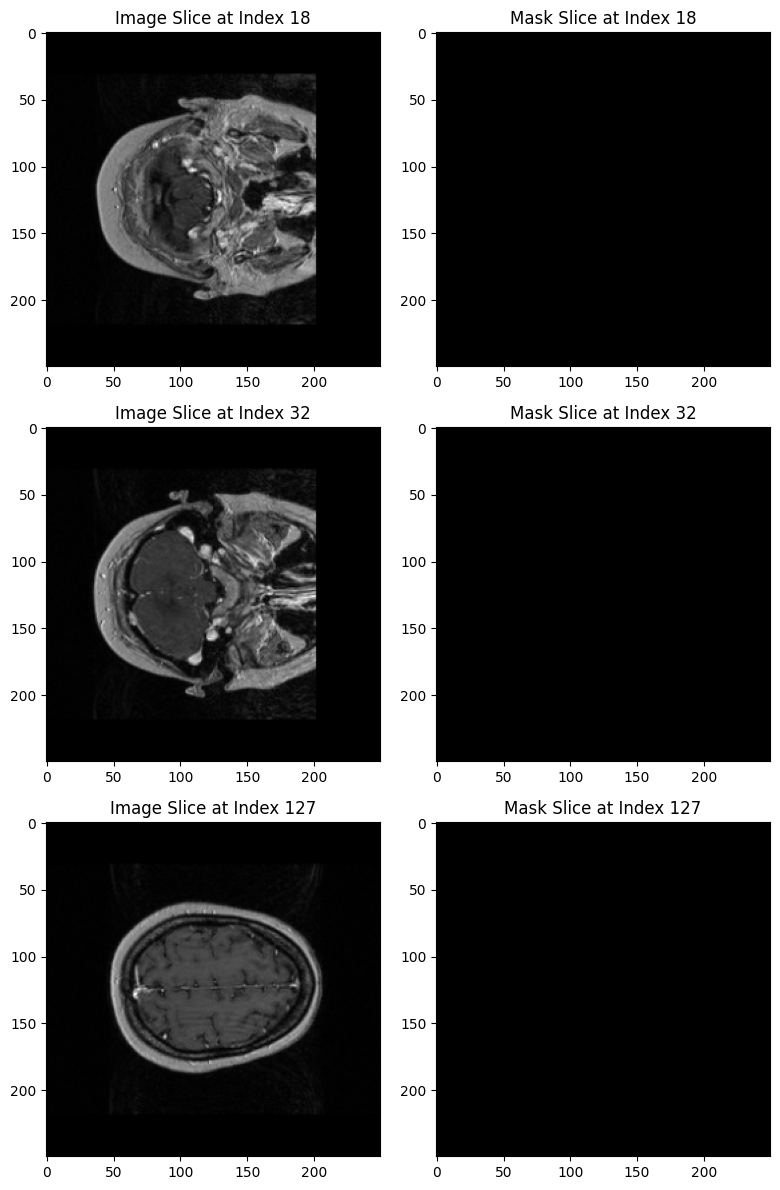

In [18]:
save_slices(image_folder,mask_folder,save_folder,"NoTumor",person1,person1_no_tumor_choosen,save=True)

In [19]:
print(person2_no_tumor)
person2_no_tumor_choosen = [20,61,100]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]


Image Slice at Index 20 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_img.png
Mask Slice at Index 20 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10024_19020206_TRA_3D_T1_HR+GD_slice_20_mask.png
Image Slice at Index 61 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_61_img.png
Mask Slice at Index 61 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10024_19020206_TRA_3D_T1_HR+GD_slice_61_mask.png
Image Slice at Index 100 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_100_img.png
Mask Slice at Index 100 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive

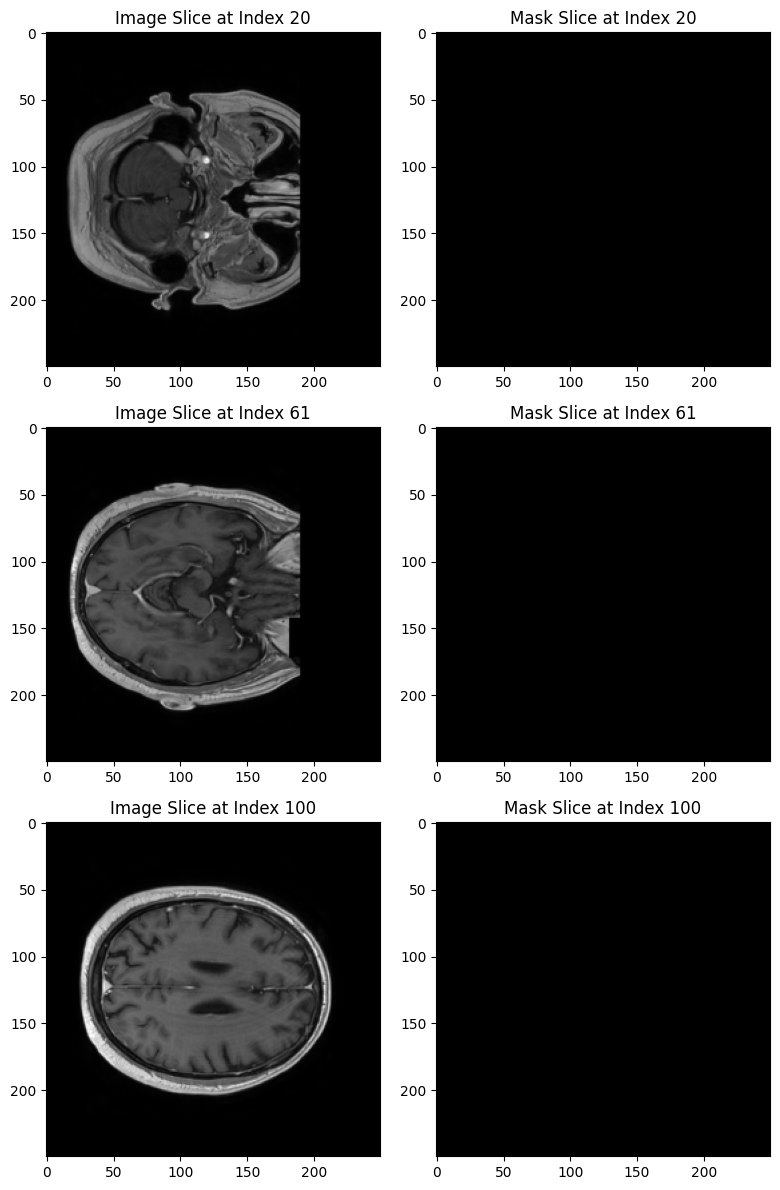

In [20]:
save_slices(image_folder,mask_folder,save_folder,"NoTumor",person2,person2_no_tumor_choosen,save=True)

In [21]:
print(person5_no_tumor)
person5_no_tumor_choosen = [49,75,92]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]


Image Slice at Index 49 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/20033_19000519_3D_T1_TFE_slice_49_img.png
Mask Slice at Index 49 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/20033_19000519_3D_T1_TFE_slice_49_mask.png
Image Slice at Index 75 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/20033_19000519_3D_T1_TFE_slice_75_img.png
Mask Slice at Index 75 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/20033_19000519_3D_T1_TFE_slice_75_mask.png
Image Slice at Index 92 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/20033_19000519_3D_T1_TFE_slice_92_img.png
Mask Slice at Index 92 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/20033_19000519_3D_T1

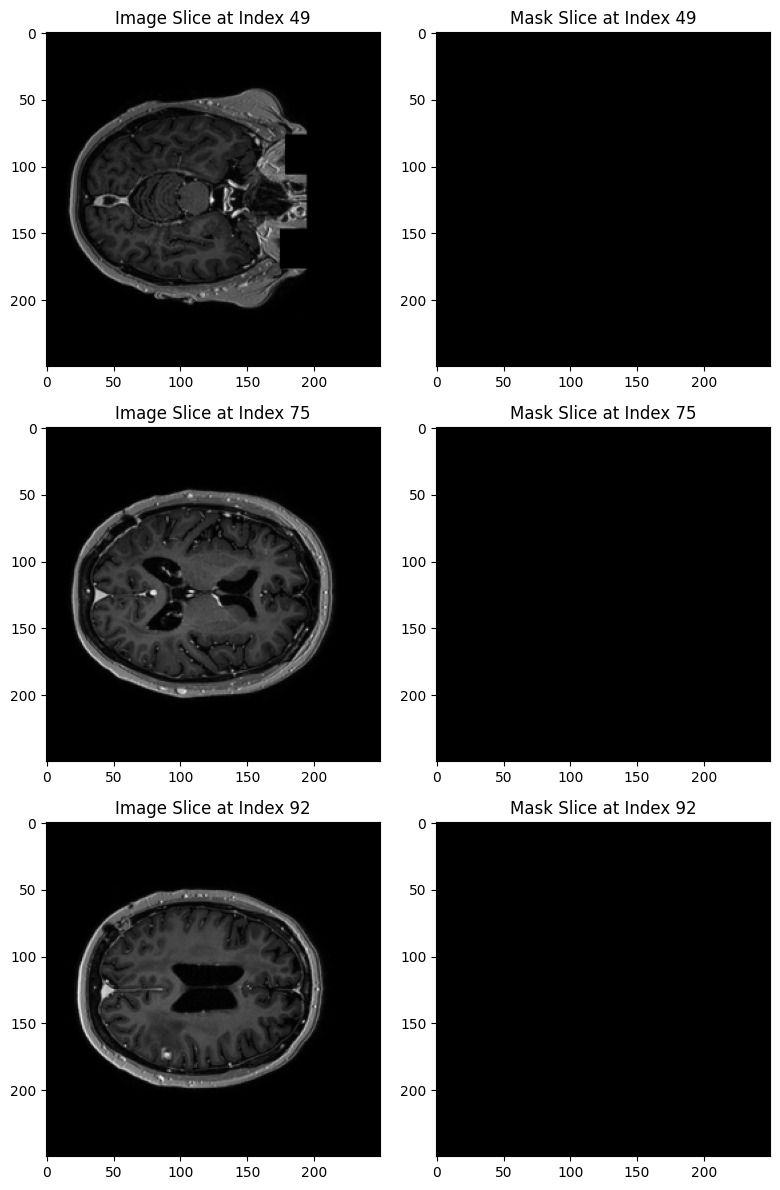

In [22]:
save_slices(image_folder,mask_folder,save_folder,"NoTumor",person5,person5_no_tumor_choosen,save=True)

## Create Slices With Tumor

In [9]:
print(person2_tumor)
person2_tumor_choosen = [69,75,77]

[69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]


Image Slice at Index 69 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_69_img.png
Mask Slice at Index 69 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10024_19020206_TRA_3D_T1_HR+GD_slice_69_mask.png
Image Slice at Index 75 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_75_img.png
Mask Slice at Index 75 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10024_19020206_TRA_3D_T1_HR+GD_slice_75_mask.png
Image Slice at Index 77 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_77_img.png
Mask Slice at Index 77 for 10024_19020206_TRA_3D_T1_HR+GD saved to /content/drive/MyDrive/

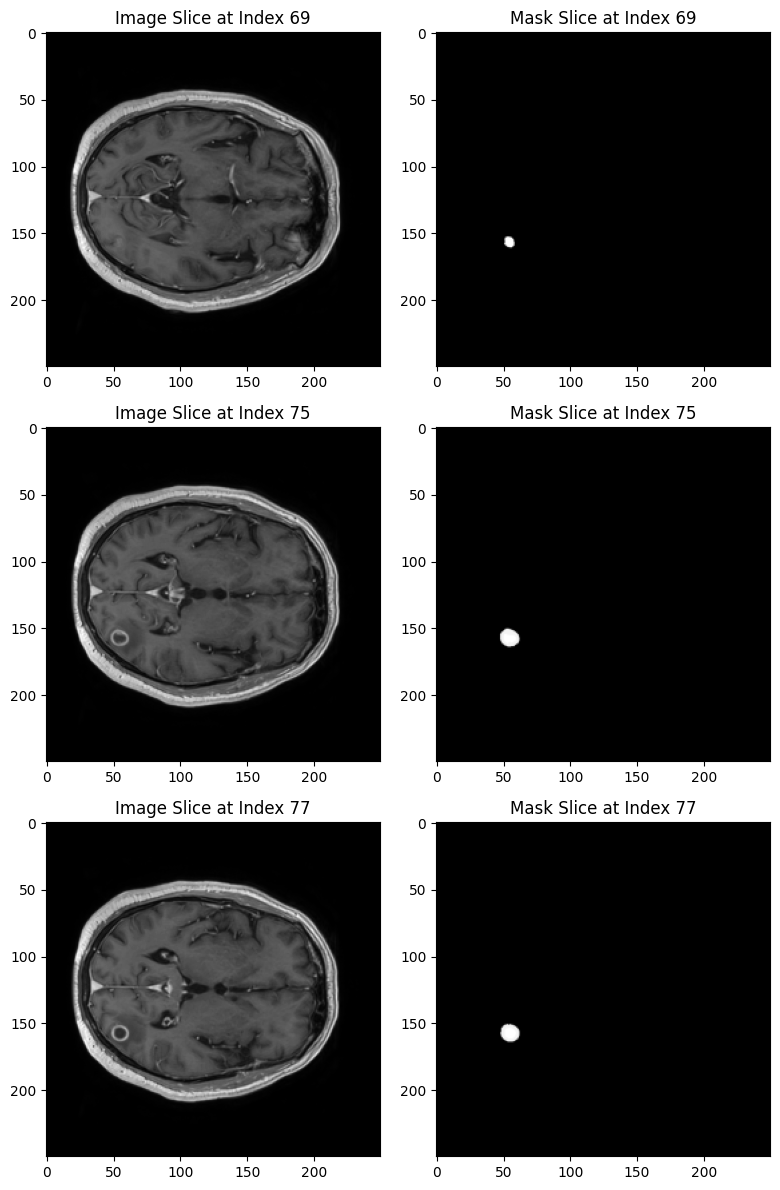

In [10]:
save_slices(image_folder,mask_folder,save_folder,"Tumor",person2,person2_tumor_choosen,save=True)

In [11]:
print(person3_tumor)
person3_tumor_choosen = [60,66,96]

[15, 16, 17, 18, 19, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 90, 91, 92, 93, 94, 95, 96, 97, 98]


Image Slice at Index 60 for 10036_19011207_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10036_19011207_eTRA-3D-T1Gd_slice_60_img.png
Mask Slice at Index 60 for 10036_19011207_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10036_19011207_eTRA-3D-T1Gd_slice_60_mask.png
Image Slice at Index 66 for 10036_19011207_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10036_19011207_eTRA-3D-T1Gd_slice_66_img.png
Mask Slice at Index 66 for 10036_19011207_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10036_19011207_eTRA-3D-T1Gd_slice_66_mask.png
Image Slice at Index 96 for 10036_19011207_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10036_19011207_eTRA-3D-T1Gd_slice_96_img.png
Mask Slice at Index 96 for 10036_19011207_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slice

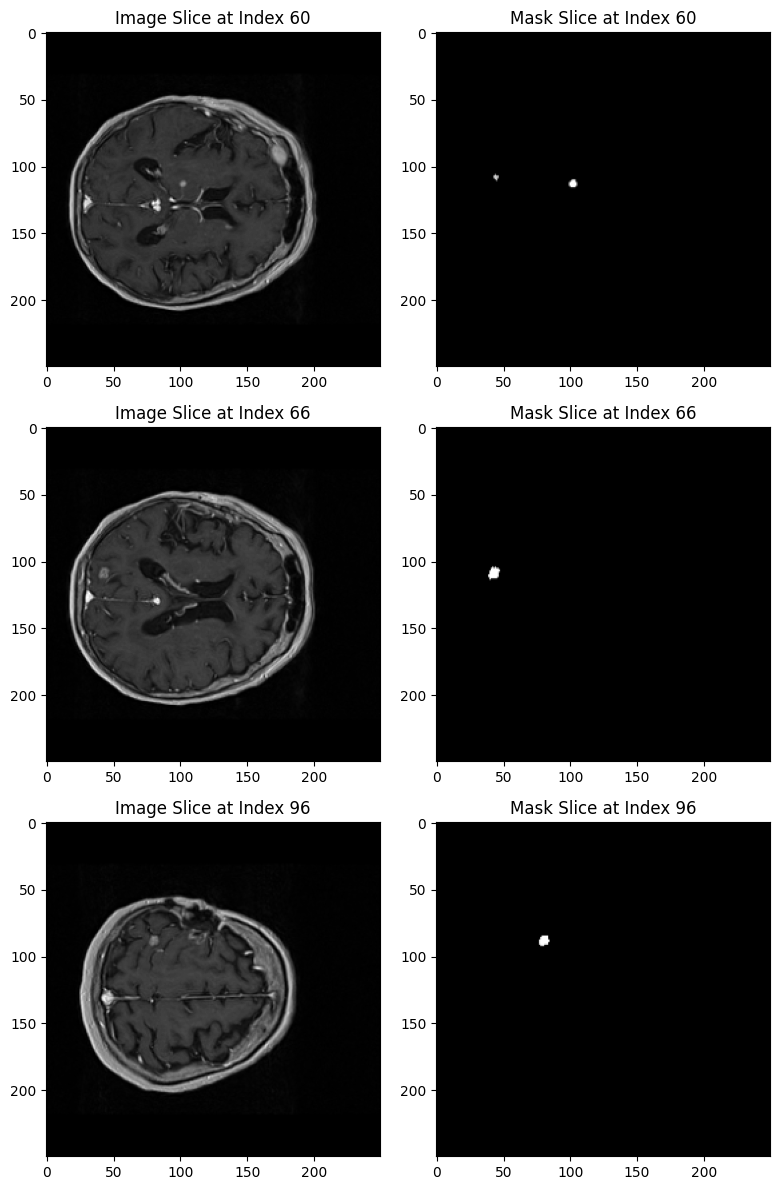

In [12]:
save_slices(image_folder,mask_folder,save_folder,"Tumor",person3,person3_tumor_choosen,save=True)

In [13]:
print(person4_tumor)
person4_tumor_choosen = [32,37]

[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]


Image Slice at Index 32 for 10005_19020413_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10005_19020413_eTRA-3D-T1Gd_slice_32_img.png
Mask Slice at Index 32 for 10005_19020413_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10005_19020413_eTRA-3D-T1Gd_slice_32_mask.png
Image Slice at Index 37 for 10005_19020413_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10005_19020413_eTRA-3D-T1Gd_slice_37_img.png
Mask Slice at Index 37 for 10005_19020413_eTRA-3D-T1Gd saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/10005_19020413_eTRA-3D-T1Gd_slice_37_mask.png


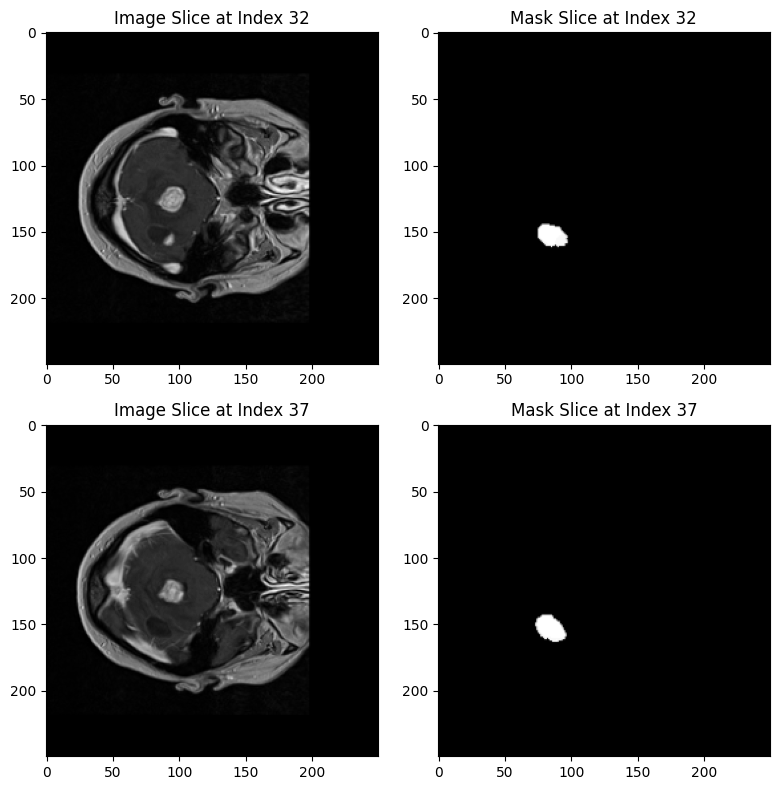

In [14]:
save_slices(image_folder,mask_folder,save_folder,"Tumor",person4,person4_tumor_choosen)

In [12]:
print(person5_tumor)
person5_tumor_choosen = [117,119]

[114, 115, 116, 117, 118, 119, 120, 121, 122]


(250, 250)
Image Slice at Index 117 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/20033_19000519_3D_T1_TFE_slice_117_img.png
Mask Slice at Index 117 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/20033_19000519_3D_T1_TFE_slice_117_mask.png
(250, 250)
Image Slice at Index 119 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/20033_19000519_3D_T1_TFE_slice_119_img.png
Mask Slice at Index 119 for 20033_19000519_3D_T1_TFE saved to /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask/20033_19000519_3D_T1_TFE_slice_119_mask.png


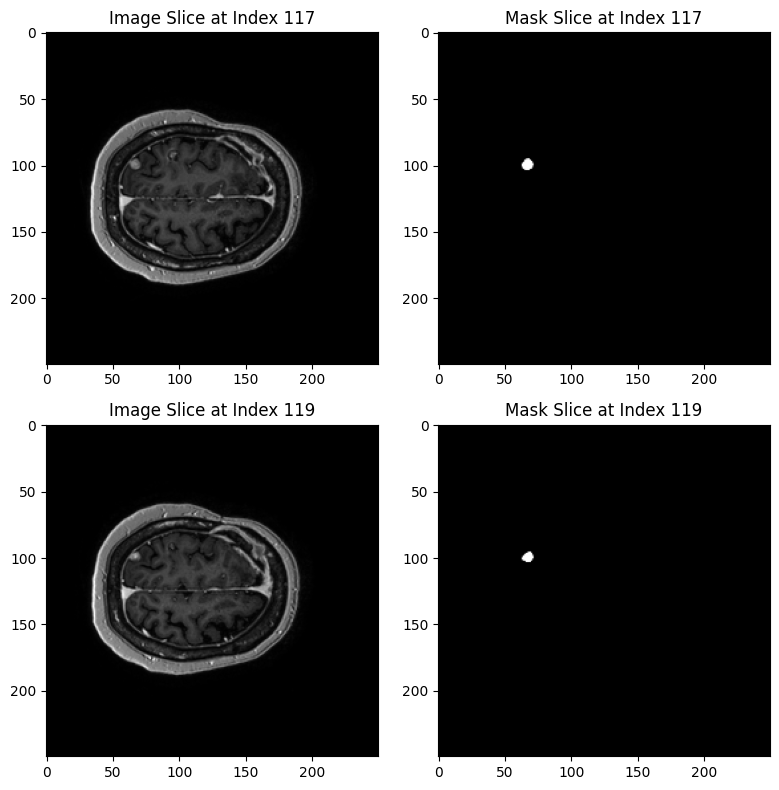

In [15]:
save_slices(image_folder,mask_folder,save_folder,"Tumor",person5,person5_tumor_choosen, save = True)

In [ ]:
image_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/NIFTIs_Images/10005_19020413_eTRA-3D-T1Gd_img.nii"
d = nib.load(image_path)
dd = d.get_fdata()
print(dd.shape)

(256, 256, 160)


In [ ]:
image_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/NIFTIs_Images/10036_19011207_eTRA-3D-T1Gd_img.nii"
d = nib.load(image_path)
dd = d.get_fdata()
print(dd.shape)

(256, 256, 140)


In [ ]:
image_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/NIFTIs_Images/10024_19020206_TRA_3D_T1_HR+GD_img.nii"
d = nib.load(image_path)
dd = d.get_fdata()
print(dd.shape)

(640, 640, 170)


## Add Tumor to a different slice
$mask*sliceWith + (1 - mask)*sliceNoTumor$



The $mask$ and $sliceWith$ images can be arbitrary, representing any masked region and a corresponding slice with a tumor.
The $sliceNoTumor$ images, on the other hand, represent slices without tumors. These slices are used as training data for the model.


In [86]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

mask_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask"
slice_with_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor"
slice_without_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor"
save_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor"

def create_naive_tumor_slice(person_with, person_without, save = False):
    global mask_path, slice_with_path, slice_without_path, save_path
    # Construct full paths for mask, slice_with, and slice_no_tumor
    full_mask_path = os.path.join(mask_path, f"{person_with}_mask.png")
    full_slice_with_path = os.path.join(slice_with_path, f"{person_with}_img.png")
    full_slice_no_tumor_path = os.path.join(slice_without_path, f"{person_without}_img.png")

    # Construct full save path
    full_save_path = os.path.join(save_path, f"{person_without}_and_{person_with}_naiveTumor.png")

    # Load images (as grayscale) and save as matrices
    mask = np.array(Image.open(full_mask_path).convert("L"))
    mask[mask != 0] = 1  # take all non-black pixels

    slice_with = np.array(Image.open(full_slice_with_path).convert("L"))
    slice_no_tumor = np.array(Image.open(full_slice_no_tumor_path).convert("L"))

    # Resize to the desired shape (250, 250)
    slice_with_resized = np.array(Image.fromarray(slice_with).resize((250, 250)))
    slice_no_tumor_resized = np.array(Image.fromarray(slice_no_tumor).resize((250, 250)))
    mask_resized = np.array(Image.fromarray(mask).resize((250, 250)))

    # Perform the operation
    result = mask_resized * slice_with_resized + (1 - mask_resized) * slice_no_tumor_resized

    # Save with shape (w, h, 3) for the model
    result = np.stack([result, result, result], axis=-1)

    if save:
      # Save the result as an image
      result_image = Image.fromarray(result.astype(np.uint8))
      result_image.save(full_save_path)

    # Display the result using matplotlib
    plt.figure(figsize=(7, 7))

    plt.subplot(2, 2, 1)
    plt.imshow(mask_resized, cmap='gray')
    plt.title('Mask')

    plt.subplot(2, 2, 2)
    plt.imshow(slice_with, cmap='gray')
    plt.title('Slice With')

    plt.subplot(2, 2, 3)
    plt.imshow(slice_no_tumor_resized, cmap='gray')
    plt.title('Slice No Tumor')

    plt.subplot(2, 2, 4)
    plt.imshow(result, cmap='gray')
    plt.title('Naive Slice')

    plt.suptitle('Add Tumor to a different slice', fontsize=16)

    # Add more space between plots
    plt.tight_layout(pad=1.0)

    plt.show()

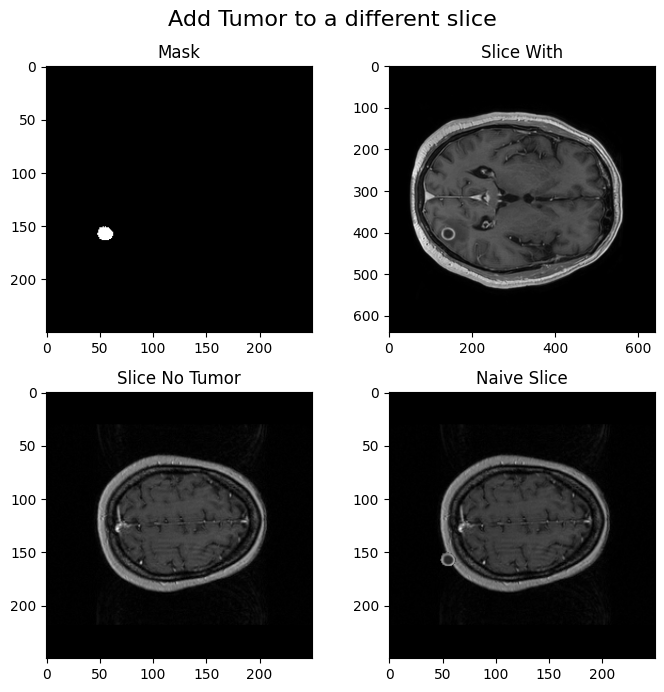

In [119]:
person_with = person2 + "_slice_77"
person_without = person1 + "_slice_127" # model trained on this slice
create_naive_tumor_slice(person_with, person_without, save = False)

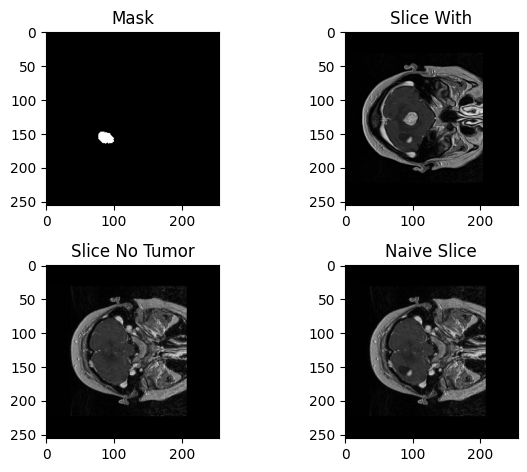

In [ ]:
# Display the result using matplotlib
# plt.subplot(2, 2, 1)
# plt.imshow(mask, cmap='gray')
# plt.title('Mask')

# plt.subplot(2, 2, 2)
# plt.imshow(sliceWith, cmap='gray')
# plt.title('Slice With')

# plt.subplot(2, 2, 3)
# plt.imshow(sliceNoTumor, cmap='gray')
# plt.title('Slice No Tumor')

# plt.subplot(2, 2, 4)
# plt.imshow(result, cmap='gray')
# plt.title('Naive Slice')

# # Add more space between plots
# plt.tight_layout(pad=1.0)

# plt.show()

## Add Tumor to a different slice in a different location

$mask'*slicewith' + (1 - mask')*slicenotumor$

$mask'$ - move mask to some random location in the image
$slicewith'$ - take corresponding place in the image

In [110]:
mask_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask"
slice_with_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor"
slice_without_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor"
save_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor"

def create_naive_tumor_slice_diff_loc(person_with, person_without, rowOffset, colOffset, save=False):
    global mask_path, slice_with_path, slice_without_path, save_path
    # Construct full paths for mask, slice_with, and slice_no_tumor
    full_mask_path = os.path.join(mask_path, f"{person_with}_mask.png")
    full_slice_with_path = os.path.join(slice_with_path, f"{person_with}_img.png")
    full_slice_no_tumor_path = os.path.join(slice_without_path, f"{person_without}_img.png")

    # Construct full save path
    full_save_path = os.path.join(save_path, f"{person_without}_and_{person_with}_diff_{str(rowOffset)}_{str(colOffset)}_naiveTumor.png")

    # Load images (as grayscale) and save as matrices
    mask = np.array(Image.open(full_mask_path).convert("L"))
    mask[mask != 0] = 1  # take all non-black pixels

    slice_with = np.array(Image.open(full_slice_with_path).convert("L"))
    slice_no_tumor = np.array(Image.open(full_slice_no_tumor_path).convert("L"))

    # Resize to the desired shape (250, 250)
    slice_with_resized = np.array(Image.fromarray(slice_with).resize((250, 250)))
    slice_no_tumor_resized = np.array(Image.fromarray(slice_no_tumor).resize((250, 250)))
    mask_resized = np.array(Image.fromarray(mask).resize((250, 250)))

    # orginalTumor, in the same location
    orgTumor = mask_resized * slice_with_resized

    # Find the indices of non-zero elements in the original mask
    non_zero_indices = np.argwhere(mask_resized != 0)

    # Create a new mask with the same shape filled with zeros
    newMask = np.zeros_like(mask_resized)
    newTumor = np.zeros_like(mask_resized)

    # Move the non-zero elements to the target indices
    for idx in non_zero_indices:
      newRow, newCol = idx[0] + rowOffset, idx[1] + colOffset
      newMask[newRow, newCol] = 1
      newTumor[newRow, newCol] = orgTumor[idx[0],idx[1]]

    # Perform the operation
    result = newTumor + (1 - newMask) * slice_no_tumor_resized

    # Save with shape (w, h, 3) for the model
    result = np.stack([result, result, result], axis=-1)

    if save:
      # Save the result as an image
      result_image = Image.fromarray(result.astype(np.uint8))
      result_image.save(full_save_path)

    # Create a 3x2 subplot grid
    fig, axes = plt.subplots(3, 2, figsize=(8, 8))

    # Display the images on the subplots
    axes[0, 0].imshow(mask_resized, cmap='gray')
    axes[0, 0].set_title('Original Mask')

    axes[0, 1].imshow(newMask, cmap='gray')
    axes[0, 1].set_title('New Mask')

    axes[1, 0].imshow(slice_with_resized, cmap='gray')
    axes[1, 0].set_title('Original Slice With')

    axes[2, 0].imshow(slice_no_tumor_resized, cmap='gray')
    axes[2, 0].set_title('Original Slice No Tumor')

    axes[2, 1].imshow(result, cmap='gray')
    axes[2, 1].set_title('Naive Slice')

    # Remove the empty subplot
    fig.delaxes(axes[1, 1])

    # Add a title to the entire subplot grid
    plt.suptitle('Add Tumor to a different slice in a different location', fontsize=16)

    # Add more space between plots
    plt.tight_layout(pad=1.0)

    # Show the plot
    plt.show()

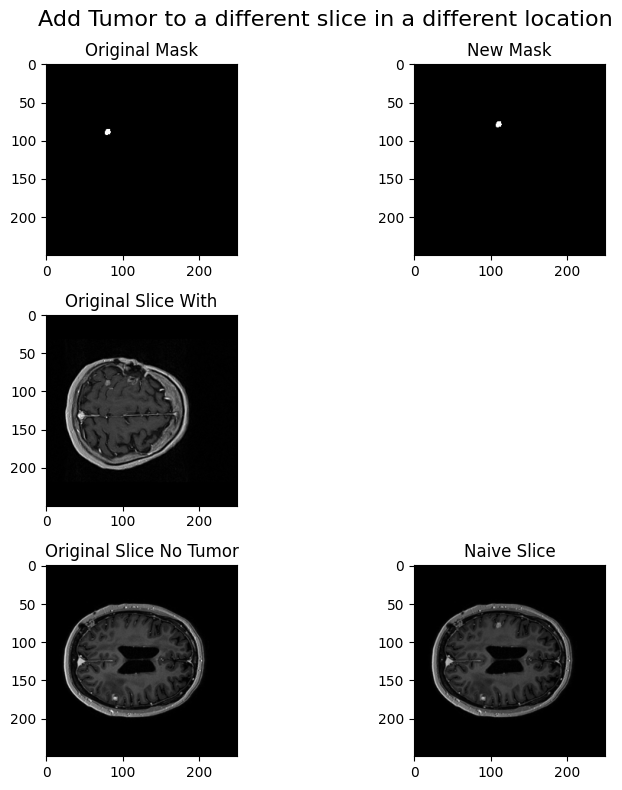

In [143]:
person_with = person3 + "_slice_96"
person_without = person5 + "_slice_92" # model trained on this slice
create_naive_tumor_slice_diff_loc(person_with,person_without,-10,30,save=True)

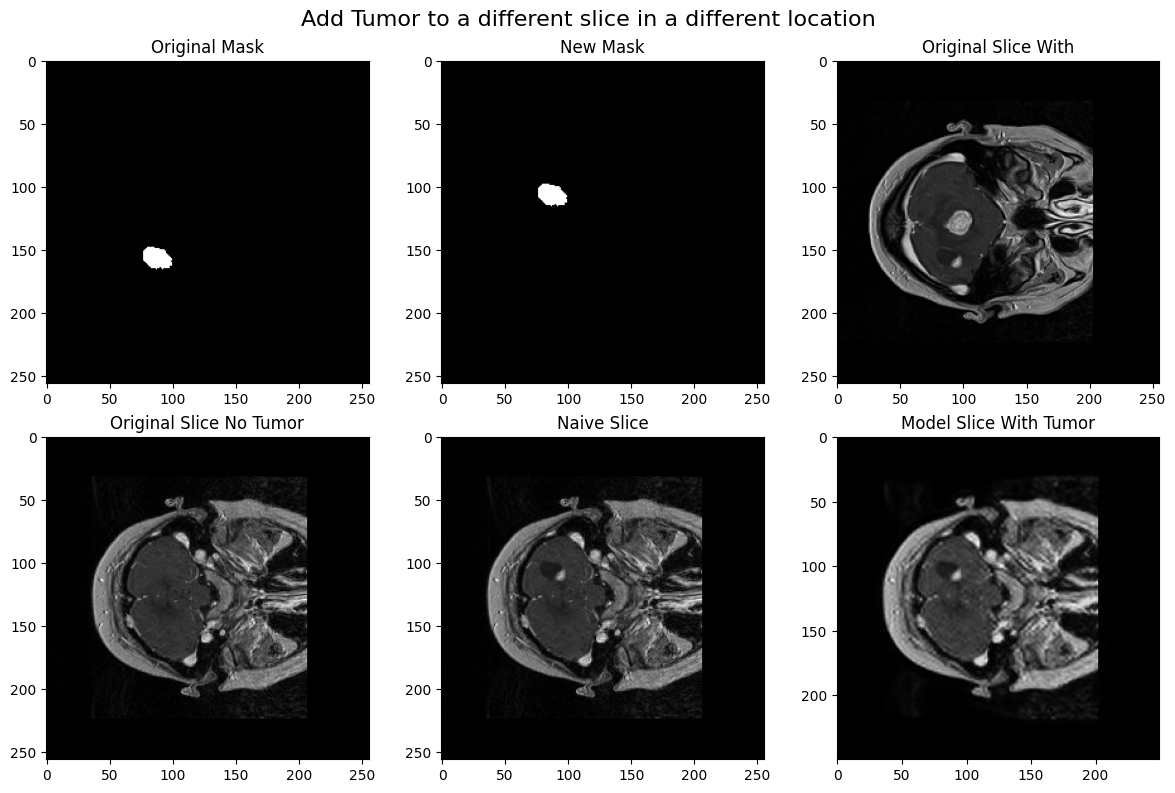

In [ ]:
# # Create a 2x3 subplot grid
# fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# # Display the images on the subplots
# axes[0, 0].imshow(mask, cmap='gray')
# axes[0, 0].set_title('Original Mask')

# axes[0, 1].imshow(newMask, cmap='gray')
# axes[0, 1].set_title('New Mask')

# axes[0, 2].imshow(sliceWith, cmap='gray')
# axes[0, 2].set_title('Original Slice With')

# axes[1, 0].imshow(sliceNoTumor, cmap='gray')
# axes[1, 0].set_title('Original Slice No Tumor')

# axes[1, 1].imshow(result, cmap='gray')
# axes[1, 1].set_title('Naive Slice')

# axes[1, 2].imshow(sliceModel, cmap='gray')
# axes[1, 2].set_title('Model Slice With Tumor')


# # Add a title to the entire subplot grid
# plt.suptitle('Add Tumor to a different slice in a different location', fontsize=16)

# # Add more space between plots
# plt.tight_layout(pad=1.0)

# # Show the plot
# plt.show()

## Remove Tumor

1) Generate a mirrored version of the original mask.

2) Update the indices of the original mask with the corresponding mirrored indices.

In [ ]:
# Example usage of np.flipud:
original_mask = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 1, 1]
])

print("Original Mask:")
print(original_mask)
print("\nMirror Mask:")
print(np.flipud(original_mask))

Original Mask:
[[0 0 0]
 [0 0 0]
 [0 1 1]]

Mirror Mask:
[[0 1 1]
 [0 0 0]
 [0 0 0]]


In [5]:
mask_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/mask"
slice_with_path = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor"
save_path_no_tumor = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor"

def create_naive_no_tumor(person_with, save = False):
    global mask_path, slice_with_path, save_path_no_tumor
    # Construct full paths for mask, slice_with, and slice_no_tumor
    full_mask_path = os.path.join(mask_path, f"{person_with}_mask.png")
    full_slice_with_path = os.path.join(slice_with_path, f"{person_with}_img.png")

    # Construct full save path
    save_path = os.path.join(save_path_no_tumor, f"{person_with}_naiveNoTumor.png")

    # Load images (as grey scale) and save as matrices
    mask = np.array(Image.open(full_mask_path).convert("L"))
    sliceWith = np.array(Image.open(full_slice_with_path).convert("L"))

    # Form masks
    mask[mask != 0] = 1 # take all non black pixels
    newMask = np.flipud(mask) # mirror mask

    # Find the indices of non-zero elements in the original mask and mirror mask
    new_non_zero_indices = np.argwhere(newMask != 0)
    org_non_zero_indices = np.argwhere(mask != 0)

    # Create a copy of the slice with tumor
    newNoTumor = np.copy(sliceWith)

    # Iterate through indices and update newNoTumor to remove the original tumor
    for new_index, org_index in zip(new_non_zero_indices, org_non_zero_indices):
        newNoTumor[org_index[0], org_index[1]] = sliceWith[new_index[0], new_index[1]]

    # Save with shape (w,h,3) for the model
    newNoTumor = np.stack([newNoTumor, newNoTumor, newNoTumor], axis=-1)

    if save:
      # Save the result as an image
      result_image = Image.fromarray(newNoTumor.astype(np.uint8))
      result_image.save(save_path)

    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))

    # Display the images on the subplots
    axes[0, 0].imshow(mask, cmap='gray')
    axes[0, 0].set_title('Original Mask')

    axes[0, 1].imshow(newMask, cmap='gray')
    axes[0, 1].set_title('Mirror Mask')

    axes[1, 0].imshow(sliceWith, cmap='gray')
    axes[1, 0].set_title('Original Slice With')

    axes[1, 1].imshow(newNoTumor, cmap='gray')
    axes[1, 1].set_title('New Naive Slice No Tumor')

    # Add a title to the entire subplot grid
    plt.suptitle('Remove Tumor', fontsize=16)

    # Add more space between plots
    plt.tight_layout(pad=1.0)

    # Show the plot
    plt.show()

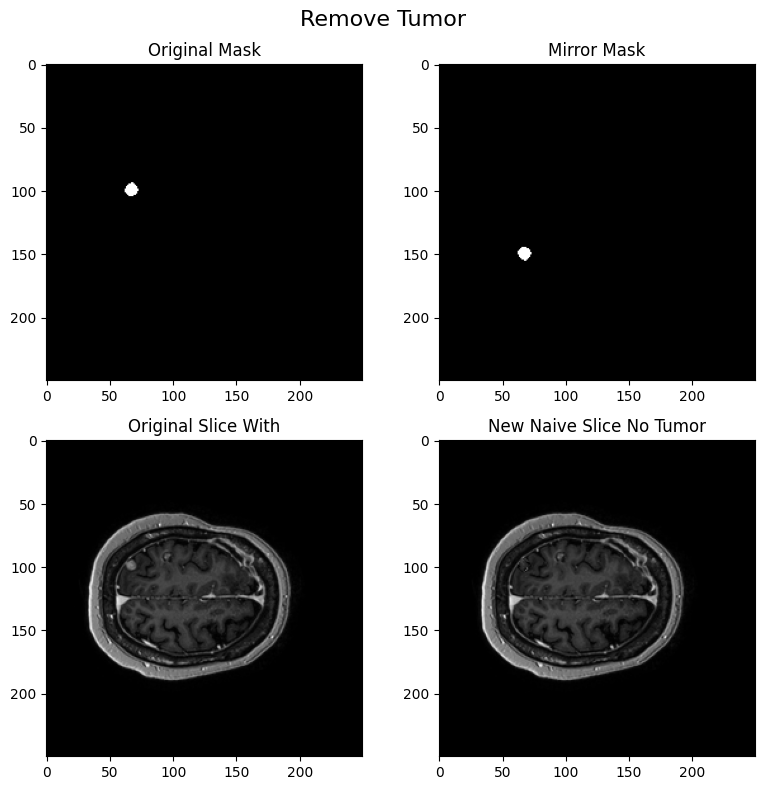

In [14]:
person_with = person5 + "_slice_117"
create_naive_no_tumor(person_with,save = True)

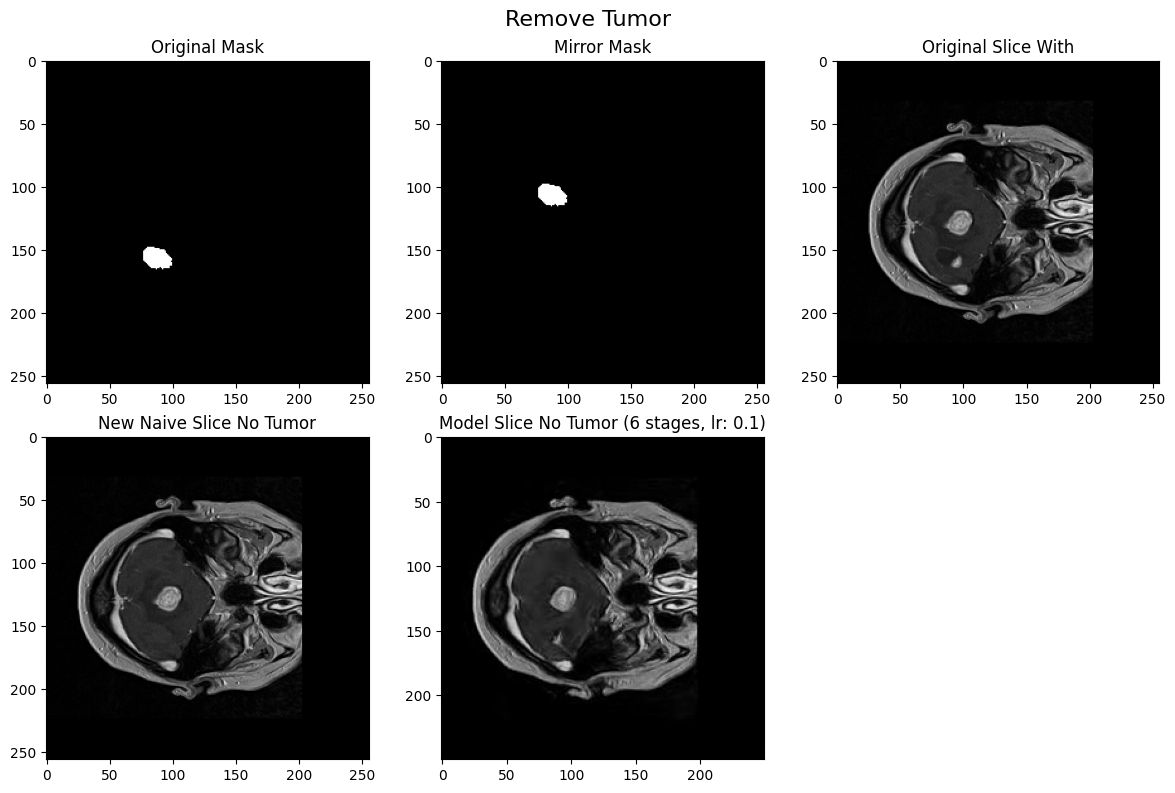

In [ ]:
# # Create a 2x3 subplot grid
# fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# # Display the images on the subplots
# axes[0, 0].imshow(mask, cmap='gray')
# axes[0, 0].set_title('Original Mask')

# axes[0, 1].imshow(newMask, cmap='gray')
# axes[0, 1].set_title('Mirror Mask')

# axes[0, 2].imshow(sliceWith, cmap='gray')
# axes[0, 2].set_title('Original Slice With')

# axes[1, 0].imshow(newNoTumor, cmap='gray')
# axes[1, 0].set_title('New Naive Slice No Tumor')

# axes[1, 1].imshow(sliceModel6, cmap='gray')
# axes[1, 1].set_title('Model Slice No Tumor (6 stages, lr: 0.1)')

# # Remove the empty subplot in the last row and column
# fig.delaxes(axes[1, 2])

# # Add a title to the entire subplot grid
# plt.suptitle('Remove Tumor', fontsize=16)

# # Add more space between plots
# plt.tight_layout(pad=1.0)

# # Show the plot
# plt.show()

# Train Slices with No Tumor for Harmonization


```
python main_train.py --gpu 0 --train_mode harmonization --train_stages 3 --min_size 120 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name Images/Harmonization/scream.jpg
```



## 6 stages - lr_scale=0.1


```
python main_train.py --gpu 0 --train_mode harmonization --train_stages 6 --min_size 120 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name <trained_img>
```

person1 = "10005_19020128_TRA-3D-T1"
- slice 18
- slice 32
- slice 127

person2 = "10024_19020206_TRA_3D_T1_HR+GD"
- slice 20
- slice 61
- slice 100

person3 = "10036_19011207_eTRA-3D-T1Gd"

person5 = "20033_19000519_3D_T1_TFE"
- slice 49
- slice 75
- slice 92



In [6]:
!python main_train.py --gpu 0 --train_mode harmonization --train_stages 6 --min_size 120 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/20033_19000519_3D_T1_TFE_slice_92_img.png

2023-12-06 09:01:29.427061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 09:01:29.427119: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 09:01:29.427162: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 09:01:29.435873: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 09:01:30.587926: W tensorflow/compiler/

## 3 Stages - lr_scale=0.1

```
python main_train.py --gpu 0 --train_mode harmonization --train_stages 3 --min_size 120 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name <trained_img>
```

person1 = "10005_19020128_TRA-3D-T1"
- slice 18
- slice 32
- slice 127

person2 = "10024_19020206_TRA_3D_T1_HR+GD"
- slice 20
- slice 61
- slice 100

person3 = "10036_19011207_eTRA-3D-T1Gd"

person5 = "20033_19000519_3D_T1_TFE"
- slice 49
- slice 75
- slice 92



In [7]:
!python main_train.py --gpu 0 --train_mode harmonization --train_stages 3 --min_size 120 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/20033_19000519_3D_T1_TFE_slice_92_img.png

2023-12-06 09:24:58.806964: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 09:24:58.807027: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 09:24:58.807069: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 09:24:58.815241: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 09:24:59.976063: W tensorflow/compiler/

## Additonal configurations in an attemp to produce model slices with better resolution

All of the below tests ran on

person2 = "10024_19020206_TRA_3D_T1_HR+GD"

- slice 20

3_stages and 6_stages with min_size = 240 were also trained on:

person1 = "10005_19020128_TRA-3D-T1"
- slice 18

person5 = "20033_19000519_3D_T1_TFE"

- slice 49



### 6 stages - lr_scale=0.5




In [4]:
!python main_train.py --gpu 0 --train_mode harmonization --train_stages 6 --lr_scale 0.5 --min_size 120 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_img.png

2023-12-06 21:27:11.185153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 21:27:11.185202: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 21:27:11.185245: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 21:27:11.193324: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 21:27:12.289059: W tensorflow/compiler/

### 6 stages - min_size = 240


In [6]:
!python main_train.py --gpu 0 --train_mode harmonization --train_stages 6 --min_size 240 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/20033_19000519_3D_T1_TFE_slice_49_img.png

2023-12-07 20:06:04.089695: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 20:06:04.089755: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 20:06:04.089796: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 20:06:04.098273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 20:06:05.266202: W tensorflow/c

### 6 stages - min_size = 25

In [5]:
!python main_train.py --gpu 0 --train_mode harmonization --train_stages 6 --lr_scale 0.1 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_img.png

2023-12-07 19:39:57.276129: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 19:39:57.282245: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 19:39:57.282320: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 19:39:57.322658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 19:40:02.641876: W tensorflow/c

### 3 stages - min_size = 240

In [13]:
!python main_train.py --gpu 0 --train_mode harmonization --train_stages 3 --lr_scale 0.1 --min_size 240 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10005_19020128_TRA-3D-T1_slice_18_img.png

2023-12-08 08:10:03.532959: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 08:10:03.533017: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 08:10:03.533061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 08:10:03.544293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 08:10:05.035525: W tensorflow/compiler/

### 3 stages - min_size = 200

In [16]:
!python main_train.py --gpu 0 --train_mode harmonization --train_stages 3 --lr_scale 0.1 --min_size 200 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_img.png

2023-12-07 16:49:14.950967: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 16:49:14.951029: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 16:49:14.951071: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 16:49:14.962993: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 16:49:16.572935: W tensorflow/compiler/

### 8 Stages

In [4]:
!python main_train.py --gpu 0 --train_mode harmonization --train_stages 8 --lr_scale 0.1 --min_size 120 --lrelu_alpha 0.3 --niter 1000 --batch_norm --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_img.png

2023-12-07 07:43:35.661704: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 07:43:35.661753: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 07:43:35.661794: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 07:43:35.669477: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 07:43:36.703444: W tensorflow/c

### 6 stages - generaiton

In [10]:
!python main_train.py --gpu 0 --train_mode generation --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_img.png

2023-12-07 15:14:19.112051: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 15:14:19.112120: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 15:14:19.112169: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 15:14:19.123447: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 15:14:20.496857: W tensorflow/compiler/

# Apply Harmonization for Trained Models


```
python evaluate_model.py --gpu 0 --model_dir TrainedModels/scream/.../ --naive_img Images/Harmonization/scream_naive.jpg
```



person1 = "10005_19020128_TRA-3D-T1"
- slice 18
  - 10036_19011207_eTRA-3D-T1Gd_slice_66_diff_15_50
- slice 32
  - 20033_19000519_3D_T1_TFE_slice_119
- slice 127
  - 10024_19020206_TRA_3D_T1_HR+GD_slice_77_diff_0_30

person2 = "10024_19020206_TRA_3D_T1_HR+GD"
- slice 20
  - 20033_19000519_3D_T1_TFE_slice_117
- slice 61
  - 10005_19020413_eTRA-3D-T1Gd_slice_32
- slice 100
  - 10036_19011207_eTRA-3D-T1Gd_slice_60

person5 = "20033_19000519_3D_T1_TFE"
- slice 49
  - 10024_19020206_TRA_3D_T1_HR+GD_slice_75_diff_0_30
- slice 75
  - 10005_19020413_eTRA-3D-T1Gd_slice_37_diff_0_30
- slice 92
  - 10036_19011207_eTRA-3D-T1Gd_slice_96_diff_-10_30
  


3 stages models

In [ ]:
!python evaluate_model.py --gpu 0 --model_dir   --naive_img

In [52]:
!python evaluate_model.py --gpu 0 --model_dir /content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_92_img/3_stages_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3  --naive_img /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor/20033_19000519_3D_T1_TFE_slice_92_and_10036_19011207_eTRA-3D-T1Gd_slice_96_diff_-10_30_naiveTumor.png

Loading models...
Harmonization/Editing only performed without mask.
Done. Results saved at: /content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_92_img/3_stages_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation


In [54]:
import shutil
import os

#source = "/content/drive/MyDrive/ConSinGAN/TrainedModels/10024_19020206_TRA_3D_T1_HR+GD_slice_20_img/3_stages_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation"
#name = "harmonized_wo_mask.jpg"
# source_path = os.path.join(source, name)

dest = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/3_stages"
new_name = "20033_19000519_3D_T1_TFE_slice_92_and_10036_19011207_eTRA-3D-T1Gd_slice_96_diff_-10_30_modelTumor"

# Construct the full paths
source_path = "/content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_92_img/3_stages_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation/harmonized_wo_mask.jpg"
dest_path = os.path.join(dest, new_name)
# Copy the file
shutil.copy(source_path, dest_path)

'/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/3_stages/20033_19000519_3D_T1_TFE_slice_92_and_10036_19011207_eTRA-3D-T1Gd_slice_96_diff_-10_30_modelTumor'

6 stages models

In [55]:
!python evaluate_model.py --gpu 0 --model_dir /content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_92_img/6_stages_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3  --naive_img /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor/20033_19000519_3D_T1_TFE_slice_92_and_10036_19011207_eTRA-3D-T1Gd_slice_96_diff_-10_30_naiveTumor.png

Loading models...
Harmonization/Editing only performed without mask.
Done. Results saved at: /content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_92_img/6_stages_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation


In [56]:
dest = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/6_stages"
new_name = "20033_19000519_3D_T1_TFE_slice_92_and_10036_19011207_eTRA-3D-T1Gd_slice_96_diff_-10_30_modelTumor"

# Construct the full paths
source_path = "/content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_92_img/6_stages_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation/harmonized_wo_mask.jpg"
dest_path = os.path.join(dest, new_name)
# Copy the file
shutil.copy(source_path, dest_path)

'/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/6_stages/20033_19000519_3D_T1_TFE_slice_92_and_10036_19011207_eTRA-3D-T1Gd_slice_96_diff_-10_30_modelTumor'

In [5]:
import os
import shutil

source_folder = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/3_stages"
destination_folder = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/3_stages_png"

# List all files in the source folder
files = os.listdir(source_folder)

# Iterate through each file
for file in files:
    # Check if the file has no extension or ends with ".jpg" or ".jpeg" (case insensitive)
    if "." not in file or file.lower().endswith(".jpg") or file.lower().endswith(".jpeg"):
        # Add ".jpg" extension to the file name
        new_file_name = file + ".jpg"

        # Create the source and destination file paths
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(destination_folder, new_file_name)

        # Copy the file to the destination with the new extension
        shutil.copy(source_path, destination_path)

print("Files copied with new extensions to the destination folder.")


Files copied with new extensions to the destination folder.


## More configurations in an attemp to produce model slices with better resolution





```
!python evaluate_model.py --gpu 0 --model_dir   --naive_img /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_and_20033_19000519_3D_T1_TFE_slice_117_naiveTumor.png
```
All tests on:
person2 = "10024_19020206_TRA_3D_T1_HR+GD"
- slice 20
  - 20033_19000519_3D_T1_TFE_slice_117

Specials Models:
- 3 stages min_size = 200
- 3 stages min_size = 240
- 6 stages lr_scale = 0.5
- 6 stages min_size = 25
- 6 stages min_size = 240
- 8 stages

3_stages and 6_stages with min_size = 240 were also trained on:

person1 = "10005_19020128_TRA-3D-T1"
- slice 18

person5 = "20033_19000519_3D_T1_TFE"
- slice 49

In [14]:
!python evaluate_model.py --gpu 0 --model_dir /content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_49_img/6_stages_min_size_240_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3 --naive_img /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor/20033_19000519_3D_T1_TFE_slice_49_and_10024_19020206_TRA_3D_T1_HR+GD_slice_75_diff_0_30_naiveTumor.png

Loading models...
Harmonization/Editing only performed without mask.
Done. Results saved at: /content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_49_img/6_stages_min_size_240_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation


copying images

In [16]:
import shutil
import os

dest_6_stages = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/diff_tests/6_stages_min_size_240"
dest_3_stages = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/diff_tests/3_stages_min_size_240"

#org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/10005_19020128_TRA-3D-T1_slice_18_img/6_stages_min_size_240_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation/harmonized_wo_mask.jpg"
#org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/10005_19020128_TRA-3D-T1_slice_18_img/3_stages_min_size_240_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation/harmonized_wo_mask.jpg"
#org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_49_img/3_stages_min_size_240_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation/harmonized_wo_mask.jpg"
org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_49_img/6_stages_min_size_240_harmonization_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.3/Evaluation/harmonized_wo_mask.jpg"
new_name = "6_stages_min_size_240_20033_19000519_3D_T1_TFE_slice_49_and_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelTumor.jpg"


# Create the full destination path
full_dest_path = os.path.join(dest_6_stages, new_name)

# Copy the file
shutil.copy(org, full_dest_path)

# Verify the file is copied
print(f"File copied to: {full_dest_path}")

File copied to: /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/diff_tests/6_stages_min_size_240/6_stages_min_size_240_20033_19000519_3D_T1_TFE_slice_49_and_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelTumor.jpg


### Plot for visualization

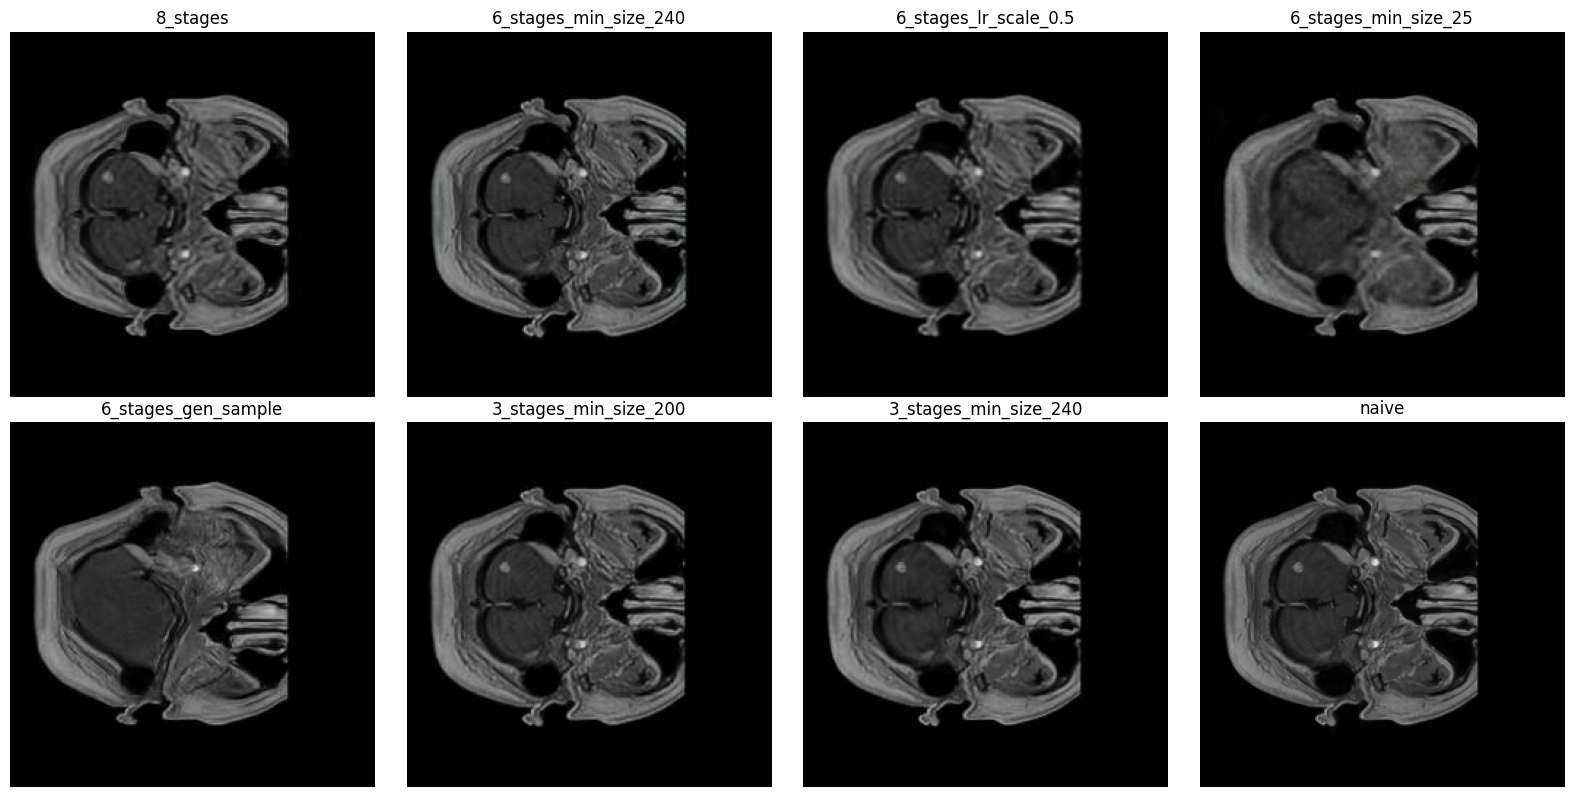

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Create a subplot
pre = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/diff_tests"
img1 = "8_stages_10024_19020206_slice_20_and_20033_19000519_slice_117.jpg"
img2 = "6_stages_min_size_240_10024_19020206_slice_20_and_20033_19000519_slice_117.jpg"
img3 = "6_stages_lr_scale_0.5_10024_19020206_slice_20_and_20033_19000519_slice_117.jpg"
img4 = "6_stages_min_size_25_0024_19020206_slice_20_and_20033_19000519_slice_117.jpg"
img5 = "6_stages_gen_sample_10024_19020206_slice_20.jpg"
img6 = "3_stages_min_size_200_10024_19020206_slice_20_and_20033_19000519_slice_117.jpg"
img7 = "3_stages_min_size_240_10024_19020206_slice_20_and_20033_19000519_slice_117.jpg"
full_img8 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_and_20033_19000519_3D_T1_TFE_slice_117_naiveTumor.png"

# Titles
titles = [
    "8_stages", "6_stages_min_size_240", "6_stages_lr_scale_0.5", "6_stages_min_size_25", "6_stages_gen_sample", "3_stages_min_size_200", "3_stages_min_size_240",
    "naive"
]

# Create a subplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through file paths and titles to populate the subplots
for i, (ax, title) in enumerate(zip(axes, titles)):
    # Load the image from file path
    if i < 7:
        img_path = os.path.join(pre, eval(f"img{i + 1}"))
    else:
        img_path = full_img8

    image = mpimg.imread(img_path)

    # Display the image
    ax.imshow(image)
    ax.axis('off')  # Turn off axis
    ax.set_title(title)  # Set title

# Add extra space between plots
plt.tight_layout(pad=1.0)
plt.show()

### Take diffrence between real and model to see where most of the pixels are chagning

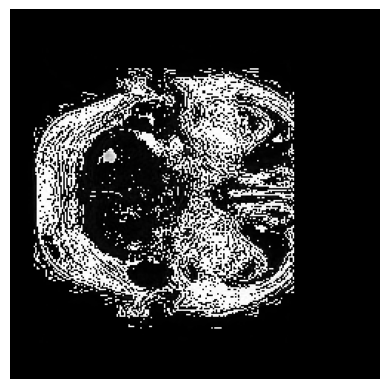

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image1_path = '/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_20_img.png'
image2_path = '/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/diff_tests/3_stages_min_size_240_10024_19020206_slice_20_and_20033_19000519_slice_117.jpg'

# Open the images using PIL
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Convert images to NumPy arrays
array1 = np.array(image1.convert('RGB'))  # Convert to RGB to remove alpha channel if present
array2 = np.array(image2)

# Calculate the absolute difference between the images
difference_array = np.abs(array1 - array2)

# Convert the NumPy array back to a PIL Image
difference_image = Image.fromarray(difference_array.astype(np.uint8))

# If you want to save the difference image
difference_image.save('difference_image.jpg')

# Display the resulting difference image using matplotlib
plt.imshow(difference_image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


### Fid score for configurations with min_size = 240

FID score between real and naive

In [17]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/diff_tests_compare /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor/naive_diff_test_compare

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 260MB/s]
100% 1/1 [00:02<00:00,  2.74s/it]
100% 1/1 [00:00<00:00,  1.21it/s]
FID:  88.95538246232569


FID score between real and 3 stages with min_size 240

In [18]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/diff_tests_compare /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/diff_tests/3_stages_min_size_240

100% 1/1 [00:01<00:00,  1.71s/it]
100% 1/1 [00:00<00:00,  1.84it/s]
FID:  94.03716002143781


FID score between real and 6 stages with min_size 240

In [19]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/diff_tests_compare /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/diff_tests/6_stages_min_size_240

100% 1/1 [00:01<00:00,  1.56s/it]
100% 1/1 [00:00<00:00,  1.46it/s]
FID:  88.0717167941083


# Fid scores for Harmonization

FID score between real and naive

In [23]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor

100% 1/1 [00:02<00:00,  2.11s/it]
100% 1/1 [00:02<00:00,  2.67s/it]
FID:  10.018062767260716


FID score between real and models slices with 3 stages

In [11]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/3_stages_jpg

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 245MB/s]
100% 1/1 [00:03<00:00,  3.42s/it]
100% 1/1 [00:02<00:00,  2.42s/it]
FID:  105.75748604357858


FID score between real and and models with 6 stages

In [12]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/6_stages_jpg

100% 1/1 [00:01<00:00,  1.67s/it]
100% 1/1 [00:02<00:00,  2.61s/it]
FID:  99.38590945749351


# Plot harmonization for visualization

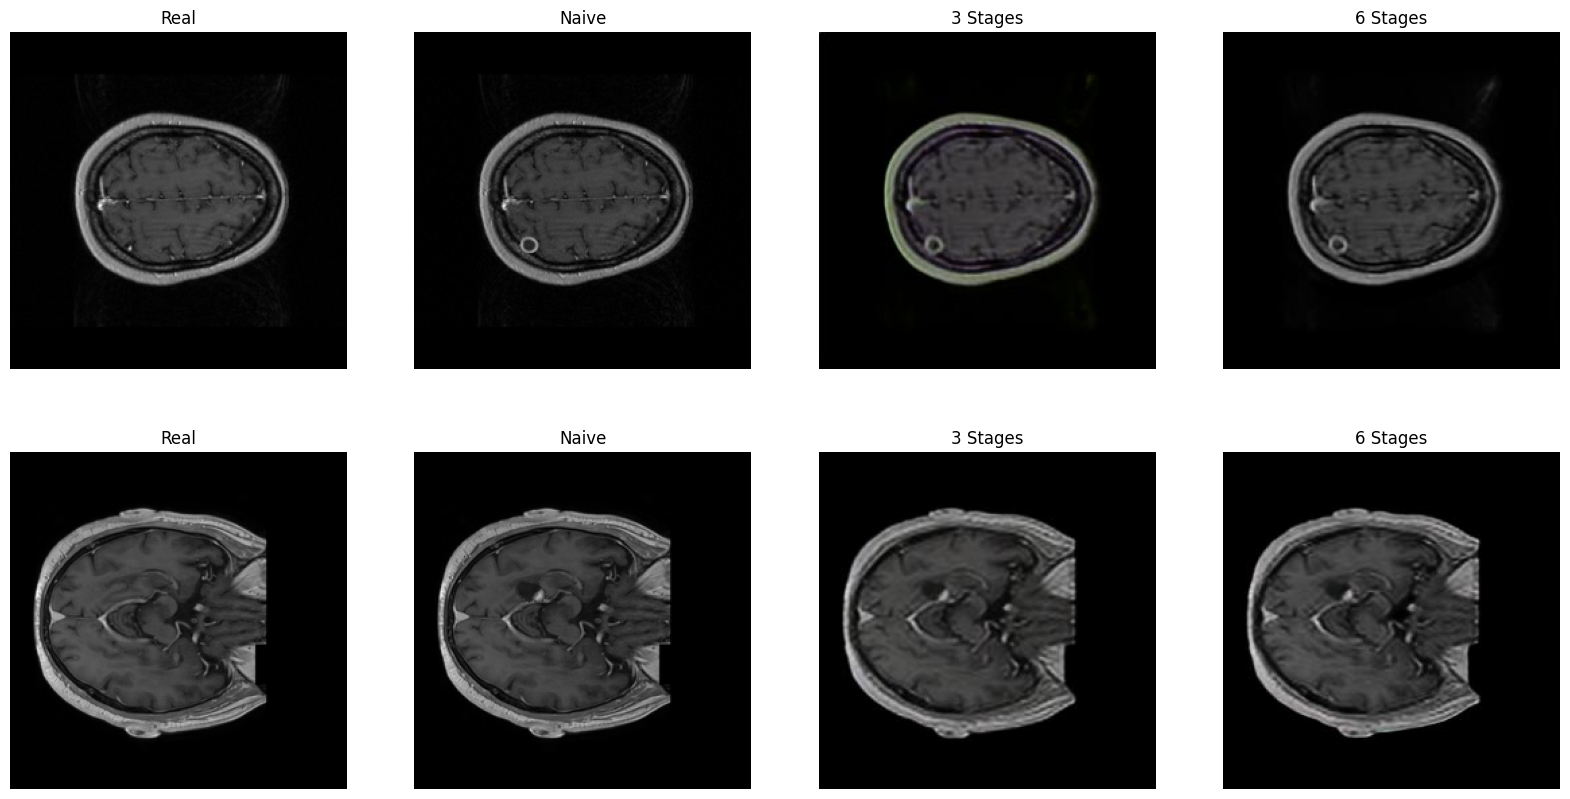

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1_real = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10005_19020128_TRA-3D-T1_slice_127_img.png"
img1_naive = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor/10005_19020128_TRA-3D-T1_slice_127_and_10024_19020206_TRA_3D_T1_HR+GD_slice_77_diff_0_30_naiveTumor.png"
img1_stage3 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/3_stages_jpg/10005_19020128_TRA-3D-T1_slice_127_and_10024_19020206_TRA_3D_T1_HR+GD_slice_77_diff_0_30_modelTumor.jpg"
img1_stage6 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/6_stages_jpg/10005_19020128_TRA-3D-T1_slice_127_and_10024_19020206_TRA_3D_T1_HR+GD_slice_77_diff_0_30_modelTumor.jpg"

img2_real = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_61_img.png"
img2_naive = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_61_and_10005_19020413_eTRA-3D-T1Gd_slice_32_diff_naiveTumor.png"
img2_stage3 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/3_stages_jpg/10024_19020206_TRA_3D_T1_HR+GD_slice_61_and_10005_19020413_eTRA-3D-T1Gd_slice_32_diff_modelTumor.jpg"
img2_stage6 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelTumor/6_stages_jpg/10024_19020206_TRA_3D_T1_HR+GD_slice_61_and_10005_19020413_eTRA-3D-T1Gd_slice_32_diff_modelTumor.jpg"


# Create a subplot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Real images
axes[0, 0].imshow(mpimg.imread(img1_real))
axes[0, 0].set_title("Real")
axes[1, 0].imshow(mpimg.imread(img2_real))
axes[1, 0].set_title("Real")

# Naive images
axes[0, 1].imshow(mpimg.imread(img1_naive))
axes[0, 1].set_title("Naive")
axes[1, 1].imshow(mpimg.imread(img2_naive))
axes[1, 1].set_title("Naive")

# 3 Stages images
axes[0, 2].imshow(mpimg.imread(img1_stage3))
axes[0, 2].set_title("3 Stages")
axes[1, 2].imshow(mpimg.imread(img2_stage3))
axes[1, 2].set_title("3 Stages")

# 6 Stages images
axes[0, 3].imshow(mpimg.imread(img1_stage6))
axes[0, 3].set_title("6 Stages")
axes[1, 3].imshow(mpimg.imread(img2_stage6))
axes[1, 3].set_title("6 Stages")

# Remove axis ticks
for ax in axes.flatten():
    ax.axis('off')

plt.show()

# Train Slices with Tumor for Editing


```
python main_train.py --gpu 0 --train_mode editing --batch_norm --niter 1000 --input_name Images/Editing/stone.png
```



## 6 stages

person2 = "10024_19020206_TRA_3D_T1_HR+GD"
- slice 75

person3 = "10036_19011207_eTRA-3D-T1Gd"
- slice 66

person4 = "10005_19020413_eTRA-3D-T1Gd" #same as person1 but different timestamp
- slice 32

person5 = "20033_19000519_3D_T1_TFE"
- slice 117

In [ ]:
!python main_train.py --gpu 0 --train_mode editing --batch_norm --niter 1000 --input_name  --naive_img

In [10]:
!python main_train.py --gpu 0 --train_mode editing --batch_norm --niter 1000 --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10036_19011207_eTRA-3D-T1Gd_slice_66_img.png --naive_img /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor/10036_19011207_eTRA-3D-T1Gd_slice_66_naiveNoTumor.png

2023-12-07 10:53:36.941068: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 10:53:36.941124: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 10:53:36.941164: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 10:53:36.948806: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 10:53:38.478204: W tensorflow/c

## 3 stages

person2 = "10024_19020206_TRA_3D_T1_HR+GD"
- slice 75

person3 = "10036_19011207_eTRA-3D-T1Gd"
- slice 66

person4 = "10005_19020413_eTRA-3D-T1Gd" #same as person1 but different timestamp
- slice 32

person5 = "20033_19000519_3D_T1_TFE
- slice 117

In [19]:
!python main_train.py --gpu 0 --train_mode editing --train_stages 3 --batch_norm --niter 1000 --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_75_img.png --naive_img /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_75_naiveNoTumor.png

2023-12-08 08:41:28.852396: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 08:41:28.852452: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 08:41:28.852497: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 08:41:28.862012: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 08:41:29.989447: W tensorflow/compiler/

copying images

In [23]:
import shutil
import os

dest_3_stages = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages"
dest_6_stages = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/6_stages"

#org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_117_img/6_stages_editing_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.05/harmonized_samples_stage_5/edited_sample_1000.jpg"
#org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/20033_19000519_3D_T1_TFE_slice_117_img/3_stages_editing_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.05/harmonized_samples_stage_2/edited_sample_1000.jpg"
#org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/10024_19020206_TRA_3D_T1_HR+GD_slice_75_img/6_stages_editing_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.05/harmonized_samples_stage_5/edited_sample_1000.jpg"
org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/10024_19020206_TRA_3D_T1_HR+GD_slice_75_img/3_stages_editing_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.05/harmonized_samples_stage_2/edited_sample_1000.jpg"
new_name = "3_stages_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg"

# Create the full destination path
full_dest_path = os.path.join(dest_3_stages, new_name)

# Copy the file
shutil.copy(org, full_dest_path)

# Verify the file is copied
print(f"File copied to: {full_dest_path}")

File copied to: /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages/3_stages_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg


## More configurations with min_size = 240 for test

Additonal tests conducted on:

- person2 = "10024_19020206_TRA_3D_T1_HR+GD"
  - slice 75

In [20]:
!python main_train.py --gpu 0 --train_mode editing --train_stages 3 --min_size 240 --batch_norm --niter 1000 --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_75_img.png --naive_img /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_75_naiveNoTumor.png

2023-12-08 14:12:15.896087: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 14:12:15.896140: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 14:12:15.896180: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 14:12:15.903774: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 14:12:16.973307: W tensorflow/c

In [21]:
!python main_train.py --gpu 0 --train_mode editing --train_stages 6 --min_size 240 --batch_norm --niter 1000 --input_name /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_75_img.png --naive_img /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor/10024_19020206_TRA_3D_T1_HR+GD_slice_75_naiveNoTumor.png

2023-12-08 14:46:13.037774: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 14:46:13.037827: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 14:46:13.037867: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 14:46:13.045751: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 14:46:14.113264: W tensorflow/c

copying images

In [23]:
import shutil
import os

dest_3_stages = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages_min_size_240"
dest_6_stages = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/6_stages_min_size_240"

#org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/10024_19020206_TRA_3D_T1_HR+GD_slice_75_img/6_stages_min_size_240_editing_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.05/harmonized_samples_stage_5/edited_sample_1000.jpg"
org = "/content/drive/MyDrive/ConSinGAN/TrainedModels/10024_19020206_TRA_3D_T1_HR+GD_slice_75_img/3_stages_min_size_240_editing_train_depth_3_lr_scale_0.1_BN_act_lrelu_0.05/harmonized_samples_stage_2/edited_sample_1000.jpg"
new_name = "3_stages_min_size_240_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg"

# Create the full destination path
full_dest_path = os.path.join(dest_3_stages, new_name)

# Copy the file
shutil.copy(org, full_dest_path)

# Verify the file is copied
print(f"File copied to: {full_dest_path}")

File copied to: /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages_min_size_240/3_stages_min_size_240_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg


### Plot

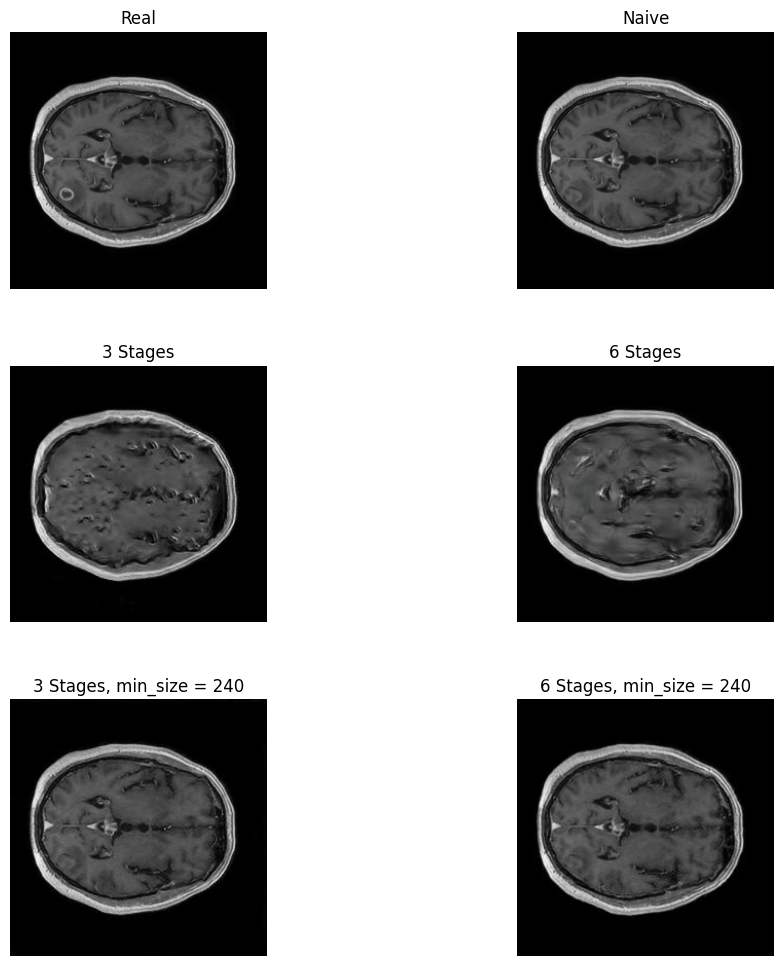

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1_real = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/remove_tests/Copy of 10024_19020206_TRA_3D_T1_HR+GD_slice_75_img.png"
img1_naive = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor/removeTests/Copy of 10024_19020206_TRA_3D_T1_HR+GD_slice_75_naiveNoTumor.png"
img1_stage3 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages/3_stages_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg"
img1_stage6 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/6_stages/6_stages_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg"
img1_stage3_240 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages_min_size_240/3_stages_min_size_240_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg"
img1_stage6_240 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/6_stages_min_size_240/6_stages_min_size_240_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg"
fig, axes = plt.subplots(3, 2,figsize=(12, 12))

# Real images
axes[0, 0].imshow(mpimg.imread(img1_real))
axes[0, 0].set_title("Real")

# Naive images
axes[0, 1].imshow(mpimg.imread(img1_naive))
axes[0, 1].set_title("Naive")

# 3 Stages images
axes[1, 0].imshow(mpimg.imread(img1_stage3))
axes[1, 0].set_title("3 Stages")

# 6 Stages images
axes[1, 1].imshow(mpimg.imread(img1_stage6))
axes[1, 1].set_title("6 Stages")

# 3 Stages with min_size 240 images
axes[2, 0].imshow(mpimg.imread(img1_stage3_240))
axes[2, 0].set_title("3 Stages, min_size = 240")

# 6 Stages with min_size 240 images
axes[2, 1].imshow(mpimg.imread(img1_stage6_240))
axes[2, 1].set_title("6 Stages, min_size = 240")

# Remove axis ticks
for ax in axes.flatten():
    ax.axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.show()

### Fid score for configurations with min_size = 240

Need more samples so did not calcualte

FID score between real and naive

In [ ]:
!python -m pytorch_fid

FID score between real and 3 stages

In [ ]:
!python -m pytorch_fid

FID score between real and 6 stages

In [ ]:
!python -m pytorch_fid

# Fid scores for Editing

FID score between real and naive slices


In [16]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/remove_tests /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor/removeTests

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:01<00:00, 82.0MB/s]
100% 1/1 [00:04<00:00,  4.10s/it]
100% 1/1 [00:03<00:00,  3.90s/it]
FID:  4.463216667801191


FID score between real and 3 stages

In [41]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/remove_tests /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages

100% 1/1 [00:02<00:00,  2.81s/it]
100% 1/1 [00:00<00:00,  3.18it/s]
FID:  184.12459046965142


FID score between real and 6 stages

In [42]:
!python -m pytorch_fid /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/remove_tests /content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/6_stages

100% 1/1 [00:01<00:00,  1.63s/it]
100% 1/1 [00:00<00:00,  2.36it/s]
FID:  187.32386672654474


# Plot Editing for visualization

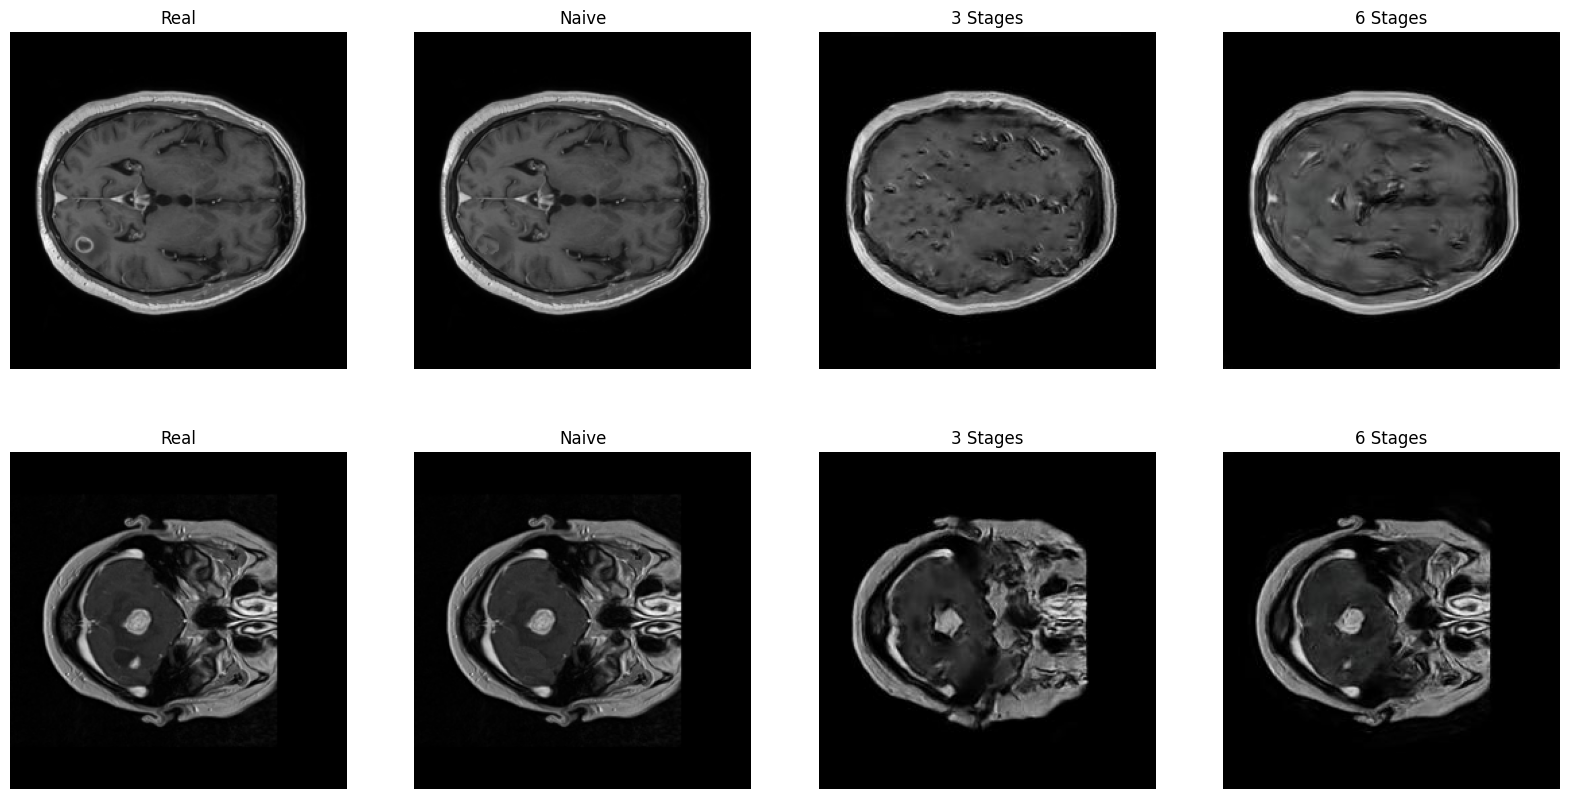

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1_real = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/remove_tests/Copy of 10024_19020206_TRA_3D_T1_HR+GD_slice_75_img.png"
img1_naive = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor/removeTests/Copy of 10024_19020206_TRA_3D_T1_HR+GD_slice_75_naiveNoTumor.png"
img1_stage3 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages/3_stages_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg"
img1_stage6 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/6_stages/6_stages_10024_19020206_TRA_3D_T1_HR+GD_slice_75_modelNo.jpg"

img2_real = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/realTumor/remove_tests/Copy of 10005_19020413_eTRA-3D-T1Gd_slice_32_img.png"
img2_naive = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/naiveNoTumor/removeTests/Copy of 10005_19020413_eTRA-3D-T1Gd_slice_32_naiveNoTumor.png"
img2_stage3 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/3_stages/3_stages_10005_19020413_eTRA-3D-T1Gd_slice_32_modelNo.jpg"
img2_stage6 = "/content/drive/MyDrive/Datasets/BrainMetastasisMRI/slices/modelNoTumor/6_stages/6_stages_10005_19020413_eTRA-3D-T1Gd_slice_32_modelNo.jpg"

# Create a subplot
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Real images
axes[0, 0].imshow(mpimg.imread(img1_real))
axes[0, 0].set_title("Real")
axes[1, 0].imshow(mpimg.imread(img2_real))
axes[1, 0].set_title("Real")

# Naive images
axes[0, 1].imshow(mpimg.imread(img1_naive))
axes[0, 1].set_title("Naive")
axes[1, 1].imshow(mpimg.imread(img2_naive))
axes[1, 1].set_title("Naive")

# 3 Stages images
axes[0, 2].imshow(mpimg.imread(img1_stage3))
axes[0, 2].set_title("3 Stages")
axes[1, 2].imshow(mpimg.imread(img2_stage3))
axes[1, 2].set_title("3 Stages")

# 6 Stages images
axes[0, 3].imshow(mpimg.imread(img1_stage6))
axes[0, 3].set_title("6 Stages")
axes[1, 3].imshow(mpimg.imread(img2_stage6))
axes[1, 3].set_title("6 Stages")

# Remove axis ticks
for ax in axes.flatten():
    ax.axis('off')

plt.show()

# Bibliography



[1] Ian J Goodfellow, Mehdi Mirza, Bing Xu, Sherjil Ozair,
Aaron Courville, and Yoshua Bengio, “Generative adver-
sarial networks,” arXiv preprint arXiv:1406.2661, 2014.

[2] Mehdi Mirza and Simon Osindero, “Conditional gener-
ative adversarial nets,” arXiv preprint arXiv:1411.1784,
2014.

[3] Tamar Rott Shaham, Tali Dekel, and Tomer Michaeli,
“Singan: Learning a generative model from a single nat-
ural image,” in IEEE International Conference on Com-
puter Vision (ICCV), 2019.

[4] Tobias Hinz, Matthew Fisher, Oliver Wang, and Stefan
Wermter, “Improved techniques for training single-image
gans,” in Proceedings of the IEEE/CVF Winter Confer-
ence on Applications of Computer Vision (WACV), Jan-
uary 2021, pp. 1300–1309. https://github.com/tohinz/ConSinGAN/tree/master

[5] B. Oca ̃na-Tienda, J. P ́erez-Beteta, and J.D. Villanueva-
Garc ́ıa et al., “A comprehensive dataset of annotated
brain metastasis mr images with clinical and radiomic
data,” Sci Data, vol. 10, pp. 208, 2023.

[6] Maximilian Seitzer, “pytorch-fid: FID Score for Py-
Torch,” https://github.com/mseitzer/pytorch-fid, August
2020, Version 0.3.0.
